In [1]:
import os
from pprint import pformat
import string

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import flopy

print(f"numpy version: {np.__version__}")
print(f"matplotlib version: {mpl.__version__}")
print(f"flopy version: {flopy.__version__}")

numpy version: 1.26.4
matplotlib version: 3.8.4
flopy version: 3.7.0.dev0


# plot heads for each stress period and each layer

In [2]:
import flopy.utils.binaryfile as bf
import math

cwd = os.getcwd()

In [3]:
Lx = 14256.43979
Ly = 11922.51802

nlay = 3
nrow = 345
ncol = 529

delr = Lx/ncol
delc = Ly/nrow

print(delr)
print(delc)

26.94979166351607
34.55802324637681


In [4]:
# Read pre-prepared reach data into numpy recarrays using numpy.genfromtxt()
reach_pth = os.path.join(
    "..",
    "..",
    "input",
    "SFR",
    "reach.csv",
)

reach_data = np.genfromtxt(reach_pth, delimiter=",", names=True)

In [5]:
#load the model: 
mf = flopy.modflow.Modflow.load(
    "basepfas.nam",
    model_ws=cwd,
    verbose=True,
    version="mfnwt",
    check=False,
)


Creating new model with name: basepfas
--------------------------------------------------

Parsing the namefile --> /home/dejun/jupyter/HydrogeologyModeling/OffDoDPFAS/AndrewModel26/modelopt03noAFFF/basepfas.nam

--------------------------------------------------
External unit dictionary:
{2: filename:/home/dejun/jupyter/HydrogeologyModeling/OffDoDPFAS/AndrewModel26/modelopt03noAFFF/basepfas.list, filetype:LIST, 32: filename:/home/dejun/jupyter/HydrogeologyModeling/OffDoDPFAS/AndrewModel26/modelopt03noAFFF/basepfas.nwt, filetype:NWT, 11: filename:/home/dejun/jupyter/HydrogeologyModeling/OffDoDPFAS/AndrewModel26/modelopt03noAFFF/basepfas.dis, filetype:DIS, 31: filename:/home/dejun/jupyter/HydrogeologyModeling/OffDoDPFAS/AndrewModel26/modelopt03noAFFF/basepfas.upw, filetype:UPW, 14: filename:/home/dejun/jupyter/HydrogeologyModeling/OffDoDPFAS/AndrewModel26/modelopt03noAFFF/basepfas.oc, filetype:OC, 13: filename:/home/dejun/jupyter/HydrogeologyModeling/OffDoDPFAS/AndrewModel26/modelopt03

In [6]:
# Create the headfile and budget file objects
head_pth = os.path.join(cwd, "basepfas.hds")
headobj = bf.HeadFile(head_pth)
times = headobj.get_times()

budget_pth = os.path.join(cwd, "basepfas.cbc")
cbb = bf.CellBudgetFile(budget_pth) 

In [7]:
#river locations
river_x = reach_data[:]["j"]*delr + delr/2 #use ncol * delr (be aware PlotMapView will flip ax-y)
river_y0 = reach_data[:]["i"]*delc + delc/2  #use nrow * delc
river_y = 344*delc - river_y0

#Need to add river stages: 

'''
"seg1_1_up_gage.out",		[1,62,90,3],	240	240	[	],	[240,240],
"seg1_2_APU_gage.out",		[1,119,91,3],	242	281	[	],	[242,281],
"seg1_3_APM_gage.out",		[1,135,92,3],	242	295	[	],	[242,295],
"seg1_4_APD_gage.out",		[1,156,93,3],	253	305	[	],	[253,305],
"seg1_5_mid_gage.out",		[1,243,94,3],	310	303	[	],	[310,303],
"seg1_6_down_gage.out",		[1,282,95,3],	342	304	[	],	[342,304],
"seg2_1_up_gage.out",		[2,17,96,3],	165	145	[	],	[165,145],
"seg2_2_AMU_gage.out",		[2,89,97,3],	201	109	[	],	[201,109],
"seg2_3_AMM_gage.out",		[2,95,98,3],	206	108	[	],	[206,108],
"seg2_4_AMD_gage.out",		[2,102,99,3],	211	106	[	],	[211,106],
"seg2_5_mid_gage.out",		[2,170,100,3],	239	68	[	],	[239,68],
"seg2_6_down_gage.out",		[2,292,101,3],	297	6	[	],	[297,6],
"seg3_1_ACU_gage.out",		[3,3,102,3],	92	296	[	],	[92,296],
"seg3_2_ACM_gage.out",		[3,18,103,3],	98	306	[	],	[98,306],
"seg3_3_ACD_gage.out",		[3,30,104,3],	93	313	[	],	[93,313],
"seg3_4_mid_gage.out",		[3,135,105,3],	82	383	[	],	[82,383],
"seg3_5_down_gage.out",		[3,226,106,3],	57	449	[	],	[57,449],
"seg3_6_River_gage.out",		[3,316,107,3],	68	526	[	],	[68,526],
'''
riverstages = np.array([
    [240,240],
#    [242,281],
    [242,295],
#    [253,305],
    [310,303],
    [342,304],
    [165,145],
#    [201,109],
    [206,108],
#    [211,106],
    [239,68],
    [297,6],
#    [92,296],
    [98,306],
#    [93,313],
    [82,383],
    [57,449],
#    [68,526],
#    [136,334],
#    [70,514],
#    [158,406],
#    [147,527],
#    [195,368],
#    [263,524],
])
riverstages_x = riverstages[:,1]*delr + delr/2
riverstages_y0 = riverstages[:,0]*delc + delc/2
riverstages_y = 344*delc - riverstages_y0


#PFAS source locations
sources = np.array([[199,244],[147,254],[182,185],[245,236]])
sources_x = sources[:,1]*delr + delr/2
sources_y0 = sources[:,0]*delc + delc/2
sources_y = 344*delc - sources_y0

#BTN obs-stage locations
btn_stages = np.array([[242,295],[206,108],[98,306],[68,526],[199,244],[147,254],[182,185],[245,236],[235,207]])
btn_stages_x = btn_stages[:,1]*delr + delr/2
btn_stages_y0 = btn_stages[:,0]*delc + delc/2
btn_stages_y = 344*delc - btn_stages_y0

ch_stages = np.array([[9,188],[2,176],[11,238],[96,180],[83,143],[86,101],[86,88],[89,63],[100,36],[125,19],[156,5],[152,36],
[175,5],[278,152],[282,121],[295,96],[300,61],[314,30],[328,11],[339,89],[26,318],[27,334],[21,350],[15,367],[23,393],[19,426],
[10,452],[10,473],[43,513],[302,408],[313,456],[311,484],[325,515],])
ch_stages_x = ch_stages[:,1]*delr + delr/2
ch_stages_y0 = ch_stages[:,0]*delc + delc/2
ch_stages_y = 344*delc - ch_stages_y0

print(river_y[1:10])
print(sources_y)
print(btn_stages_y)
print(riverstages_y)

[3542.19738275 3576.755406   3576.755406   3611.31342925 3645.87145249
 3680.42947574 3714.98749899 3714.98749899 3749.54552223]
[4993.6343591  6790.65156791 5581.12075429 3403.96528977]
[3507.63935951 4751.72819638 8483.99470699 9520.73540438 4993.6343591
 6790.65156791 5581.12075429 3403.96528977 3749.54552223]
[3576.755406   3507.63935951 1157.69377875   51.83703487 6168.60714948
 4751.72819638 3611.31342925 1606.94808096 8483.99470699 9036.92307893
 9900.87366009]


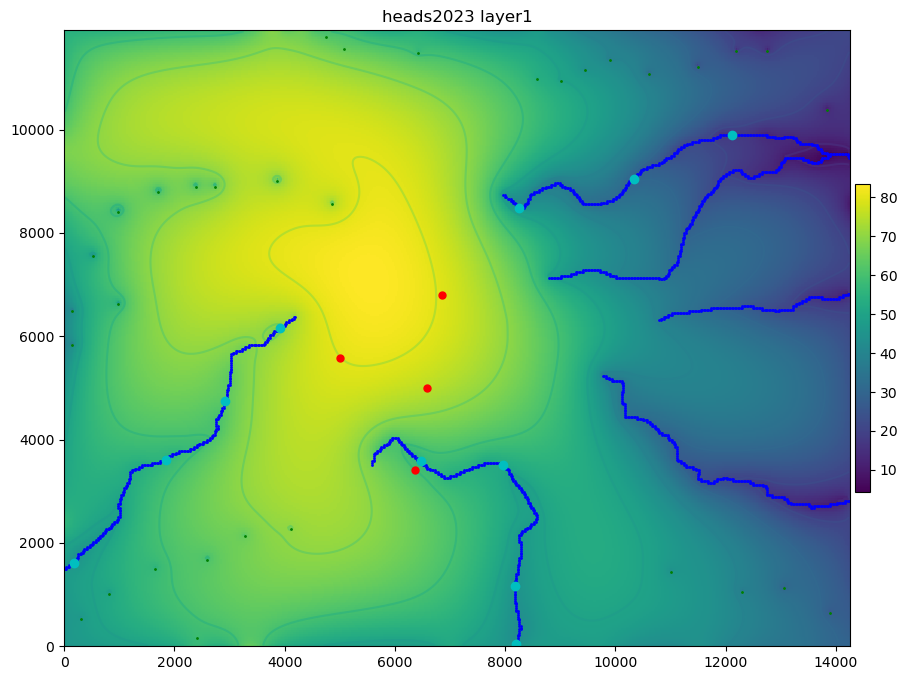

In [9]:
head_rec40 = headobj.get_data(kstpkper=(2, 19)) #(ntimestep, nperiod) 2023: (2, 19)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

layerplot = 0

pmv_head = flopy.plot.PlotMapView(mf, ax=ax, layer=layerplot)

cs_head = pmv_head.contour_array(head_rec40[layerplot])

pa_head = pmv_head.plot_array(head_rec40[layerplot]) #, vmin=-0.0005, vmax=0.0007)
plt.colorbar(pa_head, shrink=0.5, pad=0.005)

ax.plot(river_x, river_y, "b.", markersize=2.0)
#ax.plot(btn_stages_x, btn_stages_y, "y.", markersize=8.0)
ax.plot(sources_x, sources_y, "r.", markersize=10.0)
ax.plot(riverstages_x, riverstages_y, "c.", markersize=12.0)
ax.plot(ch_stages_x, ch_stages_y, "g.", markersize=2.0)

#xmin = delc1*0
#xmax = delc1*529
#ymin = delr1*0
#ymax = delr1*345
 
#plt.axis([xmin, xmax, ymin, ymax]) #Zoom-into the region

plt.title("heads2023 layer1")

plt.savefig("head2023.png")

plt.show()

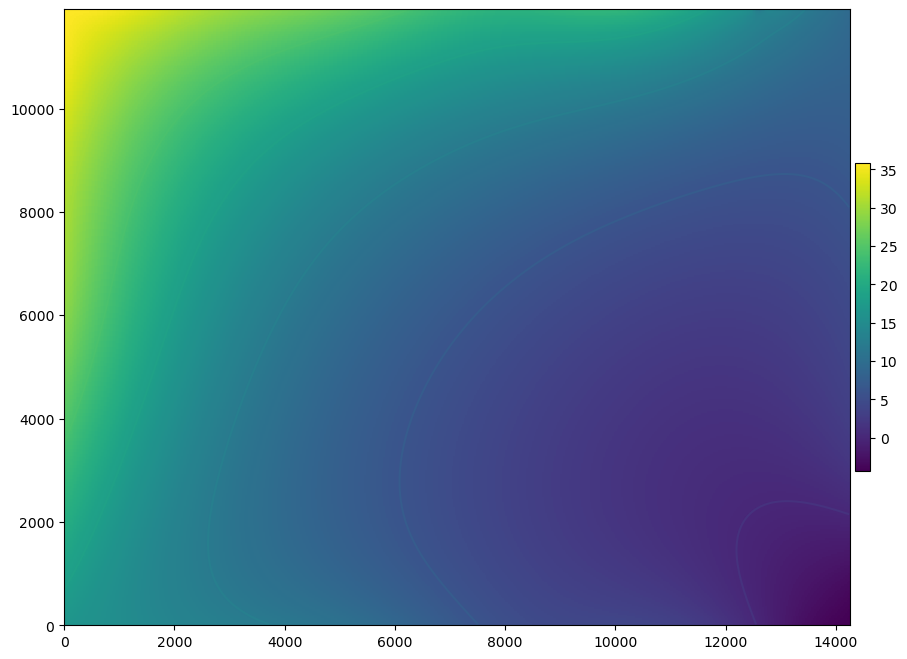

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

layerplot = 1

pmv_head = flopy.plot.PlotMapView(mf, ax=ax, layer=layerplot)

cs_head = pmv_head.contour_array(head_rec40[layerplot])

pa_head = pmv_head.plot_array(head_rec40[layerplot]) #, vmin=-0.0005, vmax=0.0007)
plt.colorbar(pa_head, shrink=0.5, pad=0.005)

plt.show()

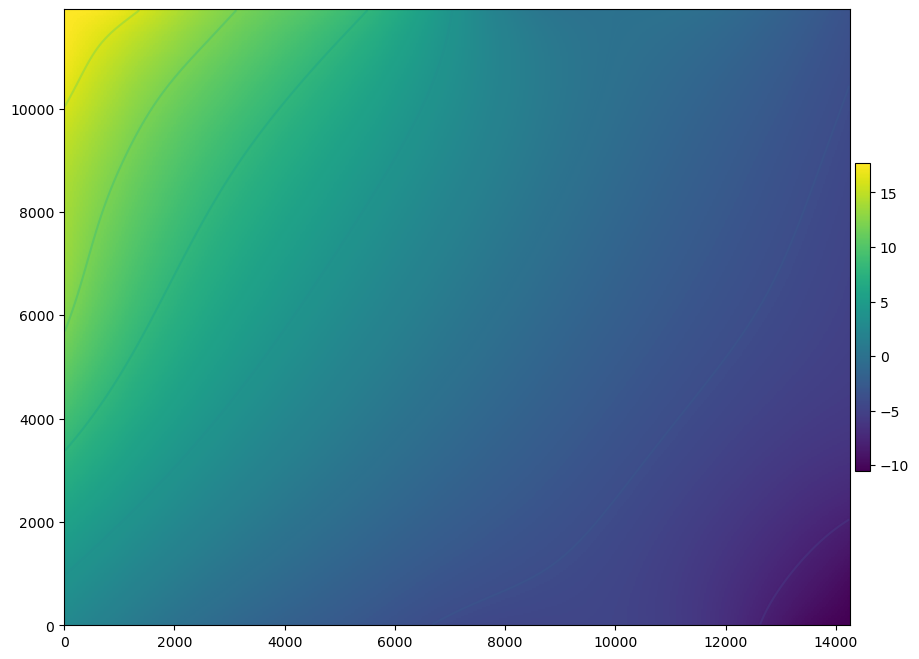

In [15]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

layerplot = 2

pmv_head = flopy.plot.PlotMapView(mf, ax=ax, layer=layerplot)

cs_head = pmv_head.contour_array(head_rec40[layerplot])

pa_head = pmv_head.plot_array(head_rec40[layerplot]) #, vmin=-0.0005, vmax=0.0007)
plt.colorbar(pa_head, shrink=0.5, pad=0.005)

plt.show()

# Plot concentration Plume

In [16]:
conc_pth = os.path.join(cwd, "MT3D001.UCN")
ucnobj = bf.UcnFile(conc_pth, model=mf)

In [17]:
conc_times = ucnobj.get_times()
pd.DataFrame(conc_times)

,0
0,18.25
1,36.50
2,54.75
3,73.00
4,91.25
...,...
3995,72927.00
3996,72945.25
3997,72963.50
3998,72981.75


In [18]:
#Setup for head and concentration
conc_times_idx = 1959

concentration = ucnobj.get_data(totim=conc_times[conc_times_idx])

model_kstpkper = headobj.get_kstpkper()
kstpkper_idx = model_kstpkper[math.floor(conc_times[conc_times_idx]/365)]

head_4conc = headobj.get_data(kstpkper=kstpkper_idx) #(ntimestep, nperiod)

print(conc_times[conc_times_idx])
print(conc_times[conc_times_idx]/365)

print(kstpkper_idx)
print(f"years: {kstpkper_idx[1]*5 + kstpkper_idx[0]}")

35770.0
98.0
(3, 19)
years: 98


In [20]:
def concplot(layerplot=0, conc_times_idx = 98*20-1, conc_limit=4E-9, file_index = 98-1, PFAS=1): 
    '''
    layerplot 0~2: 0-layer1; 1-layer2; 2-layer3
    PFAS 1~4: 1=PFOS; 2=PFHxS; 3=PFOA; 4=PFBS
    '''
    
    fig = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot()

    img = plt.imread("basemap.png")
    ax.imshow(img, extent=[0, Lx, 0, Ly])

    PFAS_file = 'MT3D00'+str(PFAS)+'.UCN'
    conc_pth = os.path.join(cwd, PFAS_file)
    ucnobj = bf.UcnFile(conc_pth, model=mf)
    concentration = ucnobj.get_data(totim=conc_times[conc_times_idx])
    
    model_kstpkper = headobj.get_kstpkper()
    kstpkper_idx = model_kstpkper[math.floor(conc_times[conc_times_idx]/365)]
    #kstpkper_idx = (4, 29)
    head_4conc = headobj.get_data(kstpkper=kstpkper_idx) #(ntimestep, nperiod)
    
    pmvm = flopy.plot.PlotMapView(mf, ax=ax, layer=layerplot)
    
    csm = pmvm.contour_array(head_4conc[layerplot], vmin=0.0, vmax=90.0)
    plt.colorbar(csm, shrink=0.5, location='left')
    
    conc_array = concentration[layerplot]
    conc_array = np.ma.masked_array(conc_array, conc_array < 3E-9)
    pa = pmvm.plot_array(conc_array, vmin=-1E-13, vmax=conc_limit) #use to adjust color bar
    plt.colorbar(pa, shrink=0.5)
    
    #source position (199,244),(147.254),(182.185),(245,236)
    ax.plot(river_x, river_y, "b.", markersize=2.0)
    ax.plot(btn_stages_x, btn_stages_y, "y.", markersize=8.0)
    ax.plot(sources_x, sources_y, "r.", markersize=12.0)
    ax.plot(riverstages_x, riverstages_y, "b.", markersize=4.0)
    ax.plot(ch_stages_x, ch_stages_y, "g.", markersize=4.0)

    year = file_index + 1926
    if PFAS==1: 
        title = 'PFOS 4ppt Plume at year' + str(year) + ' Layer' + str(layerplot+1)
    elif PFAS==2:
        title = 'PFHxS 4ppt Plume at year' + str(year) + ' Layer' + str(layerplot+1)
    elif PFAS==3:
        title = 'PFBS 4ppt Plume at year' + str(year) + ' Layer' + str(layerplot+1)
    elif PFAS==4:
        title = 'PFOA 4ppt Plume at year' + str(year) + ' Layer' + str(layerplot+1)
    plt.title(title)
    
    #filename control: 
    if PFAS==1: 
        filename = 'PFOSplumeLayer' + str(layerplot+1) + 'year' + str(file_index) + '.png'
    elif PFAS==2:
        filename = 'PFHxSplumeLayer' + str(layerplot+1) + 'year' + str(file_index) + '.png'
    elif PFAS==3:
        filename = 'PFBSplumeLayer' + str(layerplot+1) + 'year' + str(file_index) + '.png'
    elif PFAS==4:
        filename = 'PFOAplumeLayer' + str(layerplot+1) + 'year' + str(file_index) + '.png'
    
    plt.savefig(filename)
    plt.show()

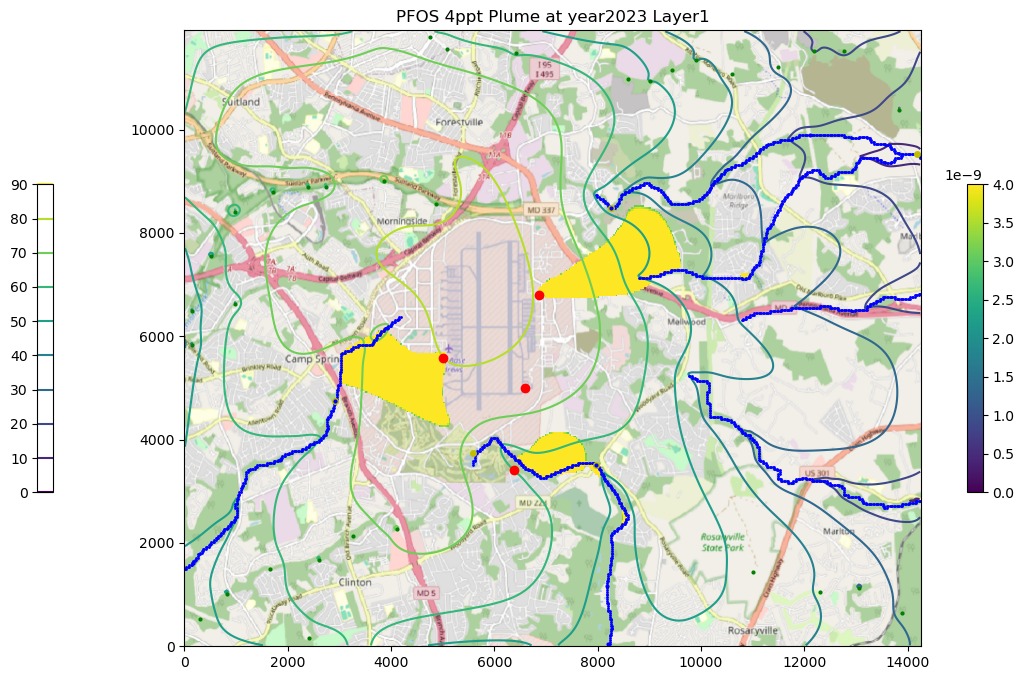

In [21]:
concplot(layerplot=0, conc_times_idx = 98*20-1,  conc_limit=4E-9, file_index=98-1, PFAS=1) # conc_times_idx=20*years; conc_limit 1E-9=ppt
                                                                                            # file_index = years + 1925

## PFOS concplot gif: 

In [22]:
''' Please aware it generates a lot files:
# PFOS layer 1 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=0, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=1)
'''

' Please aware it generates a lot files:\n# PFOS layer 1 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=0, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=1)\n'

In [23]:
'''
# PFOS layer 2 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=1, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=1)
'''

'\n# PFOS layer 2 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=1, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=1)\n'

In [24]:
'''
# PFOS layer 3 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=2, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=1)
'''

'\n# PFOS layer 3 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=2, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=1)\n'

# PFHxS concplot gif

In [25]:
'''
# PFHxS layer 1 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=0, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=2)
'''

'\n# PFHxS layer 1 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=0, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=2)\n'

In [26]:
'''
# PFHxS layer 2 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=1, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=2)
'''

'\n# PFHxS layer 2 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=1, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=2)\n'

In [27]:
'''
# PFHxS layer 3 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=2, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=2)
'''

'\n# PFHxS layer 3 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=2, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=2)\n'

# PFBS concplot gif: 

In [28]:
'''
# PFBS layer 1 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=0, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=3)
'''

'\n# PFBS layer 1 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=0, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=3)\n'

In [29]:
'''
# PFBS layer 2 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=1, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=3)
'''

'\n# PFBS layer 2 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=1, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=3)\n'

In [30]:
'''
# PFBS layer 3 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=2, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=3)
'''

'\n# PFBS layer 3 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=2, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=3)\n'

# PFOA 4ppt concplot Gif: 

In [31]:
'''
# PFOA layer 1 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=0, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=4)
'''

'\n# PFOA layer 1 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=0, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=4)\n'

In [32]:
'''
# PFOA layer 2 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=1, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=4)
'''

'\n# PFOA layer 2 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=1, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=4)\n'

In [33]:
'''
# PFOA layer 3 + 5y
for i in range(4, 200, 5):
    #print(i)
    concplot(layerplot=2, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=4)
'''

'\n# PFOA layer 3 + 5y\nfor i in range(4, 200, 5):\n    #print(i)\n    concplot(layerplot=2, conc_times_idx = i*20-1,  conc_limit=4E-9, file_index=i, PFAS=4)\n'

# Btn Stages Concentration Monitoring: 

### Col[2-4] "seg1_3_APM_gage.out"
### Col[5-7] "seg2_3_AMM_gage.out"
### Col[8-10] "seg3_2_ACM_gage.out"
### Col[11-13] "seg3_6_River_gage.out",
### Col[14-16] AFFF Area1
### Col[17-19] AFFF Area3/4
### Col[20-22] AFFF Area6
### Col[23-25] AFFF Area7
### Col[26-28] Magothy Well Location

In [37]:
def baseconcplot(PFAS=1, year_start=0, year_end=200, min_conc=-1E-10, max_conc=4E-8): 
    fig = plt.figure(figsize=(14, 6), facecolor="w")
    ax = fig.add_subplot(1, 1, 1)

    PFAS_file = 'MT3D00'+str(PFAS)+'.OBS'
    PFAS_path = os.path.join(cwd, PFAS_file)
    PFASconc = flopy.mt3d.mt.Mt3dms.load_obs(PFAS_path)

    PFASconc1 = np.array(PFASconc.tolist()).reshape(16000 // 4, 29)

    if PFAS==1:
        np.savetxt('PFOSbtnconc.csv', PFASconc1, delimiter=",")
    elif PFAS==2:
        np.savetxt('PFHxSbtnconc.csv', PFASconc1, delimiter=",")
    elif PFAS==3:
        np.savetxt('PFBSbtnconc.csv', PFASconc1, delimiter=",")
    elif PFAS==4:
        np.savetxt('PFOAbtnconc.csv', PFASconc1, delimiter=",")

    #Col[2-4] "seg1_3_APM_gage.out"
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,2], "--bo", markersize=6.0, label="APM1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,3], "--b*", markersize=6.0, label="APM2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,4], "--b+", markersize=6.0, label="APM3")
    
    #Col[5-7] "seg2_3_AMM_gage.out"¶
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,5], "--rs", markersize=6.0, label="AMM1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,6], "--rD", markersize=6.0, label="AMM2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,7], "--r^", markersize=6.0, label="AMM3")
    
    #Col[8-10] "seg3_2_ACM_gage.out"
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,8], "--go", markersize=6.0, label="ACM1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,9], "--g*", markersize=6.0, label="ACM2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,10], "--g+", markersize=6.0, label="ACM3")
    
    #Col[11-13] "seg3_6_River_gage.out",
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,11], "--gs", markersize=6.0, label="River1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,12], "--gD", markersize=6.0, label="River2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,13], "--g^", markersize=6.0, label="River3")
    
    #Col[14-16] AFFF Area1
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,14], "--ko", markersize=6.0, label="AFFF1L1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,15], "--k*", markersize=6.0, label="AFFF1L2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,16], "--k+", markersize=6.0, label="AFFF1L3")
    
    #Col[17-19] AFFF Area3/4
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,17], "--ys", markersize=6.0, label="AFFF2L1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,18], "--yD", markersize=6.0, label="AFFF2L2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,19], "--y^", markersize=6.0, label="AFFF2L3")
    
    #Col[20-22] AFFF Area6
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,20], "--yo", markersize=6.0, label="AFFF3L1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,21], "--y*", markersize=6.0, label="AFFF3L2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,22], "--y+", markersize=6.0, label="AFFF3L3")
    
    #Col[17-19] AFFF Area7
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,23], "--ks", markersize=6.0, label="AFFF4L1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,24], "--kD", markersize=6.0, label="AFFF4L2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,25], "--k^", markersize=6.0, label="AFFF4L3")
    
    #Col[26-28] Magothy Well Location
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,26], "--bs", markersize=6.0, label="MWell1")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,27], "--bD", markersize=6.0, label="MWell2")
    ax.plot(PFASconc1[:,1]/365, PFASconc1[:,28], "--b^", markersize=6.0, label="MWell3")
    
    # customize plot
    ax.set_xlabel("Time, Years")
    ax.set_ylabel("Concentration, g/L")
    #ax.set_ylim([3.5, 13])
    ticksize = 10
    
    plt.axis([year_start, year_end, min_conc, max_conc]) #Zoom-into the region
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})
    
    plt.show()

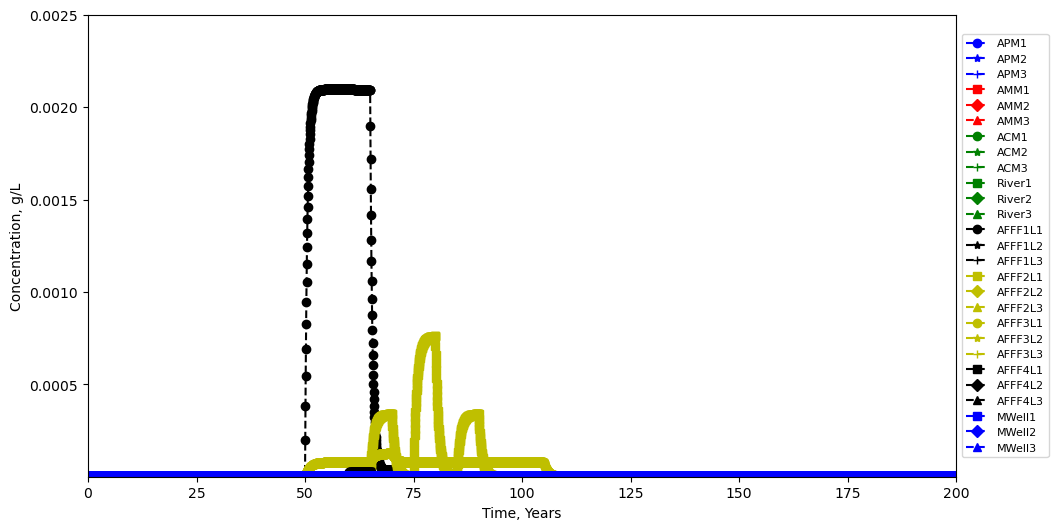

In [39]:
baseconcplot(PFAS=1, year_start=0, year_end=200, min_conc=1E-10, max_conc=2.5E-3)

# Stream Transfer Mass vs time

In [40]:
# Define a function to read SFT output file
def load_ts_from_SFT_output(fname, nd=1):
    f = open(fname)
    iline = 0
    lst = []
    for line in f:
        if line.strip().split()[0].replace(".", "", 1).isdigit():
            l = line.strip().split()
            t = float(l[0])
            loc = int(l[1])
            conc = float(l[2])
            if loc == nd:
                lst.append([t, conc])

    ts = np.array(lst)
    f.close()
    return ts

In [41]:
# Model output
fname_SFTout = os.path.join(cwd, "mtbasepfas.sftcobs.out")

# Loading MT3D-USGS output
#obs_sf = [62, 119, 135, 156, 243, 282, 301, 373, 379, 386, 454, 576, 588, 603, 615, 720, 811, 901] #sf input lines 1-based
ts1_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=62)
ts2_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=119)
ts3_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=135)
ts4_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=156)
ts5_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=243)
ts6_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=282)
ts7_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=301)
ts8_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=373)
ts9_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=379)
ts10_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=386)
ts11_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=454)
ts12_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=576)
ts13_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=588)
ts14_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=603)
ts15_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=615)
ts16_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=720)
ts17_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=811)
ts18_mt3d = load_ts_from_SFT_output(fname_SFTout, nd=901)

In [42]:
ts1_len = len(ts1_mt3d)
idx1 = np.linspace(0, ts1_len-4, ts1_len // 4, dtype=int)
idx2 = np.linspace(1, ts1_len-3, ts1_len // 4, dtype=int)
idx3 = np.linspace(2, ts1_len-2, ts1_len // 4, dtype=int)
idx4 = np.linspace(3, ts1_len-1, ts1_len // 4, dtype=int)
print(idx4)


ts1_c1 = ts1_mt3d[idx1]
ts1_c2 = ts1_mt3d[idx2]
ts1_c3 = ts1_mt3d[idx3]
ts1_c4 = ts1_mt3d[idx4]
print(ts1_c4)

[    3     7    11 ... 15991 15995 15999]
[[1.825000e+01 0.000000e+00]
 [3.650000e+01 0.000000e+00]
 [5.475000e+01 0.000000e+00]
 ...
 [7.296350e+04 3.058670e-12]
 [7.298175e+04 3.058670e-12]
 [7.300000e+04 3.058670e-12]]


In [43]:
ts2_c1 = ts2_mt3d[idx1]
ts2_c2 = ts2_mt3d[idx2]
ts2_c3 = ts2_mt3d[idx3]
ts2_c4 = ts2_mt3d[idx4]

ts3_c1 = ts3_mt3d[idx1]
ts3_c2 = ts3_mt3d[idx2]
ts3_c3 = ts3_mt3d[idx3]
ts3_c4 = ts3_mt3d[idx4]

ts4_c1 = ts4_mt3d[idx1]
ts4_c2 = ts4_mt3d[idx2]
ts4_c3 = ts4_mt3d[idx3]
ts4_c4 = ts4_mt3d[idx4]

ts5_c1 = ts5_mt3d[idx1]
ts5_c2 = ts5_mt3d[idx2]
ts5_c3 = ts5_mt3d[idx3]
ts5_c4 = ts5_mt3d[idx4]

ts6_c1 = ts6_mt3d[idx1]
ts6_c2 = ts6_mt3d[idx2]
ts6_c3 = ts6_mt3d[idx3]
ts6_c4 = ts6_mt3d[idx4]

ts7_c1 = ts7_mt3d[idx1]
ts7_c2 = ts7_mt3d[idx2]
ts7_c3 = ts7_mt3d[idx3]
ts7_c4 = ts7_mt3d[idx4]

ts8_c1 = ts8_mt3d[idx1]
ts8_c2 = ts8_mt3d[idx2]
ts8_c3 = ts8_mt3d[idx3]
ts8_c4 = ts8_mt3d[idx4]

ts9_c1 = ts9_mt3d[idx1]
ts9_c2 = ts9_mt3d[idx2]
ts9_c3 = ts9_mt3d[idx3]
ts9_c4 = ts9_mt3d[idx4]

ts10_c1 = ts10_mt3d[idx1]
ts10_c2 = ts10_mt3d[idx2]
ts10_c3 = ts10_mt3d[idx3]
ts10_c4 = ts10_mt3d[idx4]

ts11_c1 = ts11_mt3d[idx1]
ts11_c2 = ts11_mt3d[idx2]
ts11_c3 = ts11_mt3d[idx3]
ts11_c4 = ts11_mt3d[idx4]

ts12_c1 = ts12_mt3d[idx1]
ts12_c2 = ts12_mt3d[idx2]
ts12_c3 = ts12_mt3d[idx3]
ts12_c4 = ts12_mt3d[idx4]

ts13_c1 = ts13_mt3d[idx1]
ts13_c2 = ts13_mt3d[idx2]
ts13_c3 = ts13_mt3d[idx3]
ts13_c4 = ts13_mt3d[idx4]

ts14_c1 = ts14_mt3d[idx1]
ts14_c2 = ts14_mt3d[idx2]
ts14_c3 = ts14_mt3d[idx3]
ts14_c4 = ts14_mt3d[idx4]

ts15_c1 = ts15_mt3d[idx1]
ts15_c2 = ts15_mt3d[idx2]
ts15_c3 = ts15_mt3d[idx3]
ts15_c4 = ts15_mt3d[idx4]

ts16_c1 = ts16_mt3d[idx1]
ts16_c2 = ts16_mt3d[idx2]
ts16_c3 = ts16_mt3d[idx3]
ts16_c4 = ts16_mt3d[idx4]

ts17_c1 = ts17_mt3d[idx1]
ts17_c2 = ts17_mt3d[idx2]
ts17_c3 = ts17_mt3d[idx3]
ts17_c4 = ts17_mt3d[idx4]

ts18_c1 = ts18_mt3d[idx1]
ts18_c2 = ts18_mt3d[idx2]
ts18_c3 = ts18_mt3d[idx3]
ts18_c4 = ts18_mt3d[idx4]

In [44]:
# Export all the data to .csv file
np.savetxt('seg1UPPFOS.csv', ts1_c1, delimiter=",")
np.savetxt('seg1UPPFHxS.csv', ts1_c2, delimiter=",")
np.savetxt('seg1UPPFBS.csv', ts1_c3, delimiter=",")
np.savetxt('seg1UPPFOA.csv', ts1_c4, delimiter=",")

np.savetxt('seg1APUPFOS.csv', ts2_c1, delimiter=",")
np.savetxt('seg1APUPFHxS.csv', ts2_c2, delimiter=",")
np.savetxt('seg1APUPFBS.csv', ts2_c3, delimiter=",")
np.savetxt('seg1APUPFOA.csv', ts2_c4, delimiter=",")

np.savetxt('seg1APMPFOS.csv', ts3_c1, delimiter=",")
np.savetxt('seg1APMPFHxS.csv', ts3_c2, delimiter=",")
np.savetxt('seg1APMPFBS.csv', ts3_c3, delimiter=",")
np.savetxt('seg1APMPFOA.csv', ts3_c4, delimiter=",")

np.savetxt('seg1APDPFOS.csv', ts4_c1, delimiter=",")
np.savetxt('seg1APDPFHxS.csv', ts4_c2, delimiter=",")
np.savetxt('seg1APDPFBS.csv', ts4_c3, delimiter=",")
np.savetxt('seg1APDPFOA.csv', ts4_c4, delimiter=",")

np.savetxt('seg1midPFOS.csv', ts5_c1, delimiter=",")
np.savetxt('seg1midPFHxS.csv', ts5_c2, delimiter=",")
np.savetxt('seg1midPFBS.csv', ts5_c3, delimiter=",")
np.savetxt('seg1midPFOA.csv', ts5_c4, delimiter=",")

np.savetxt('seg1downPFOS.csv', ts6_c1, delimiter=",")
np.savetxt('seg1downPFHxS.csv', ts6_c2, delimiter=",")
np.savetxt('seg1downPFBS.csv', ts6_c3, delimiter=",")
np.savetxt('seg1downPFOA.csv', ts6_c4, delimiter=",")

np.savetxt('seg2UPPFOS.csv', ts7_c1, delimiter=",")
np.savetxt('seg2UPPFHxS.csv', ts7_c2, delimiter=",")
np.savetxt('seg2UPPFBS.csv', ts7_c3, delimiter=",")
np.savetxt('seg2UPPFOA.csv', ts7_c4, delimiter=",")

np.savetxt('seg2AMUPFOS.csv', ts8_c1, delimiter=",")
np.savetxt('seg2AMUPFHxS.csv', ts8_c2, delimiter=",")
np.savetxt('seg2AMUPFBS.csv', ts8_c3, delimiter=",")
np.savetxt('seg2AMUPFOA.csv', ts8_c4, delimiter=",")

np.savetxt('seg2AMMPFOS.csv', ts9_c1, delimiter=",")
np.savetxt('seg2AMMPFHxS.csv', ts9_c2, delimiter=",")
np.savetxt('seg2AMMPFBS.csv', ts9_c3, delimiter=",")
np.savetxt('seg2AMMPFOA.csv', ts9_c4, delimiter=",")

np.savetxt('seg2AMDPFOS.csv', ts10_c1, delimiter=",")
np.savetxt('seg2AMDPFHxS.csv', ts10_c2, delimiter=",")
np.savetxt('seg2AMDPFBS.csv', ts10_c3, delimiter=",")
np.savetxt('seg2AMDPFOA.csv', ts10_c4, delimiter=",")

np.savetxt('seg2midPFOS.csv', ts11_c1, delimiter=",")
np.savetxt('seg2midPFHxS.csv', ts11_c2, delimiter=",")
np.savetxt('seg2midPFBS.csv', ts11_c3, delimiter=",")
np.savetxt('seg2midPFOA.csv', ts11_c4, delimiter=",")

np.savetxt('seg2downPFOS.csv', ts12_c1, delimiter=",")
np.savetxt('seg2downPFHxS.csv', ts12_c2, delimiter=",")
np.savetxt('seg2downPFBS.csv', ts12_c3, delimiter=",")
np.savetxt('seg2downPFOA.csv', ts12_c4, delimiter=",")

np.savetxt('seg3ACUPFOS.csv', ts13_c1, delimiter=",")
np.savetxt('seg3ACUPFHxS.csv', ts13_c2, delimiter=",")
np.savetxt('seg3ACUPFBS.csv', ts13_c3, delimiter=",")
np.savetxt('seg3ACUPFOA.csv', ts13_c4, delimiter=",")

np.savetxt('seg3ACMPFOS.csv', ts14_c1, delimiter=",")
np.savetxt('seg3ACMPFHxS.csv', ts14_c2, delimiter=",")
np.savetxt('seg3ACMPFBS.csv', ts14_c3, delimiter=",")
np.savetxt('seg3ACMPFOA.csv', ts14_c4, delimiter=",")

np.savetxt('seg3ACDPFOS.csv', ts15_c1, delimiter=",")
np.savetxt('seg3ACDPFHxS.csv', ts15_c2, delimiter=",")
np.savetxt('seg3ACDPFBS.csv', ts15_c3, delimiter=",")
np.savetxt('seg3ACDPFOA.csv', ts15_c4, delimiter=",")

np.savetxt('seg3midPFOS.csv', ts16_c1, delimiter=",")
np.savetxt('seg3midPFHxS.csv', ts16_c2, delimiter=",")
np.savetxt('seg3midPFBS.csv', ts16_c3, delimiter=",")
np.savetxt('seg3midPFOA.csv', ts16_c4, delimiter=",")

np.savetxt('seg3downPFOS.csv', ts17_c1, delimiter=",")
np.savetxt('seg3downPFHxS.csv', ts17_c2, delimiter=",")
np.savetxt('seg3downPFBS.csv', ts17_c3, delimiter=",")
np.savetxt('seg3downPFOA.csv', ts17_c4, delimiter=",")

np.savetxt('seg3RiverPFOS.csv', ts18_c1, delimiter=",")
np.savetxt('seg3RiverPFHxS.csv', ts18_c2, delimiter=",")
np.savetxt('seg3RiverPFBS.csv', ts18_c3, delimiter=",")
np.savetxt('seg3RiverPFOA.csv', ts18_c4, delimiter=",")

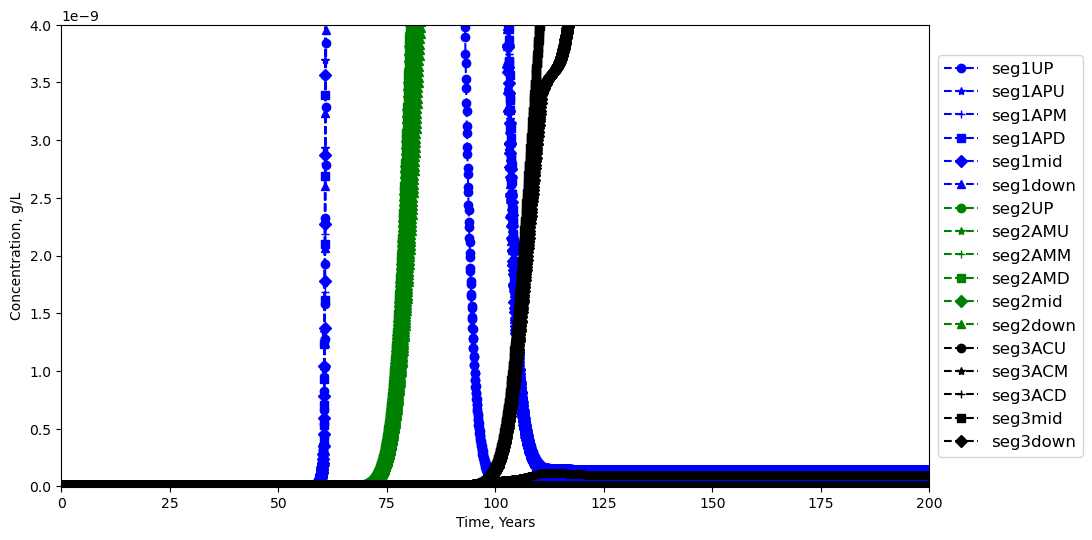

In [37]:
fig = plt.figure(figsize=(14, 6), facecolor="w")
ax = fig.add_subplot(1, 1, 1)

#segment1 observation stations:
ax.plot(ts1_c1 [:, 0]/365, ts1_c1 [:, 1], "--bo", markersize=6.0, label="seg1UP")
ax.plot(ts2_c1 [:, 0]/365, ts2_c1 [:, 1], "--b*", markersize=6.0, label="seg1APU")
ax.plot(ts3_c1 [:, 0]/365, ts3_c1 [:, 1], "--b+", markersize=6.0, label="seg1APM")
ax.plot(ts4_c1 [:, 0]/365, ts4_c1 [:, 1], "--bs", markersize=6.0, label="seg1APD")
ax.plot(ts5_c1 [:, 0]/365, ts5_c1 [:, 1], "--bD", markersize=6.0, label="seg1mid")
ax.plot(ts6_c1 [:, 0]/365, ts6_c1 [:, 1], "--b^", markersize=6.0, label="seg1down")

#segment2 observation stations:
ax.plot(ts7_c1 [:, 0]/365, ts7_c1 [:, 1], "--go", markersize=6.0, label="seg2UP")
ax.plot(ts8_c1 [:, 0]/365, ts8_c1 [:, 1], "--g*", markersize=6.0, label="seg2AMU")
ax.plot(ts9_c1 [:, 0]/365, ts9_c1 [:, 1], "--g+", markersize=6.0, label="seg2AMM")
ax.plot(ts10_c1 [:, 0]/365, ts10_c1 [:, 1], "--gs", markersize=6.0, label="seg2AMD")
ax.plot(ts11_c1 [:, 0]/365, ts11_c1 [:, 1], "--gD", markersize=6.0, label="seg2mid")
ax.plot(ts12_c1 [:, 0]/365, ts12_c1 [:, 1], "--g^", markersize=6.0, label="seg2down")

#segment3 observation stations:
ax.plot(ts13_c1 [:, 0]/365, ts13_c1 [:, 1], "--ko", markersize=6.0, label="seg3ACU")
ax.plot(ts14_c1 [:, 0]/365, ts14_c1 [:, 1], "--k*", markersize=6.0, label="seg3ACM")
ax.plot(ts15_c1 [:, 0]/365, ts15_c1 [:, 1], "--k+", markersize=6.0, label="seg3ACD")
ax.plot(ts16_c1 [:, 0]/365, ts16_c1 [:, 1], "--ks", markersize=6.0, label="seg3mid")
ax.plot(ts17_c1 [:, 0]/365, ts17_c1 [:, 1], "--kD", markersize=6.0, label="seg3down")
#ax.plot(ts18_c1 [:, 0]/365, ts18_c1 [:, 1], "--k^", markersize=6.0, label="seg3River")

# customize plot
ax.set_xlabel("Time, Years")
ax.set_ylabel("Concentration, g/L")
#ax.set_ylim([3.5, 13])
ticksize = 10

#leg._drawFrame = False

plt.axis([0, 200, -0.3E-11, 4E-9]) #Zoom-into the region

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 12})

plt.show()